# Analyse exploratoire des données

Dans ce notebook , nous procéderons à une analyse exploratoire des données.

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
data = pd.read_csv("https://rar-group-bucket.s3.eu-north-1.amazonaws.com/country_2023_08_16.csv")

In [20]:
data

,country_id,country,capital,longitude,latitude,total_gdp,total population
0,AW,Aruba,Oranjestad,-70,13,"3,126,019,385",106445
1,AF,Afghanistan,Kabul,69,35,"14,583,135,237",41128771
2,AO,Angola,Luanda,13,-9,"106,713,618,735",35588987
3,AL,Albania,Tirane,20,41,"18,882,095,518",2775634
4,AD,Andorra,Andorra la Vella,2,43,"3,352,032,737",79824
...,...,...,...,...,...,...,...
201,XK,Kosovo,Pristina,21,43,"9,429,156,202",1761985
202,YE,"Yemen, Rep.",Sana'a,44,15,"21,606,161,066",33696614
203,ZA,South Africa,Pretoria,28,-26,"405,869,718,462",59893885
204,ZM,Zambia,Lusaka,28,-15,"29,784,454,056",20017675


Tout d'abord, nous commençons par quelques statistiques descriptives

In [48]:
data.describe()

,longitude,latitude,total_gdp,total population
count,206,206,206,206
mean,18,19,"480,275,535,881","38,246,578"
std,70,24,"2,236,407,950,997","144,579,458"
min,-175,-41,"60,349,391","11,312"
25%,-15,4,"7,277,446,587","1,214,124"
50%,19,16,"29,870,611,793","6,792,022"
75%,48,40,"220,233,719,592","28,099,040"
max,179,64,"25,462,700,000,000","1,417,173,173"


Ensuite, nous examinerons le nombre total de pays présents dans nos données.

In [32]:
print("Nombre de pays : ", data['country'].nunique())

Nombre de pays :  206


Top 10, des pays avec le plus grand PIB (total_gdp)

In [37]:
# Configuration de l'affichage des montants en format avec aucun chiffre après la virgule
pd.options.display.float_format = '{:,.0f}'.format

top_10_gdp = data.nlargest(10, 'total_gdp')

top_10_gdp_countries = top_10_gdp[['country', 'total_gdp']]

top_10_gdp_countries

,country,total_gdp
193,United States,"25,462,700,000,000"
35,China,"17,963,170,521,080"
93,Japan,"4,231,141,201,863"
48,Germany,"4,072,191,736,090"
85,India,"3,385,089,881,935"
66,United Kingdom,"3,070,667,732,359"
62,France,"2,782,905,325,625"
156,Russian Federation,"2,240,422,438,363"
32,Canada,"2,139,840,023,674"
90,Italy,"2,010,431,598,465"


Graphique illustrant les 10 pays avec le plus grand PIB

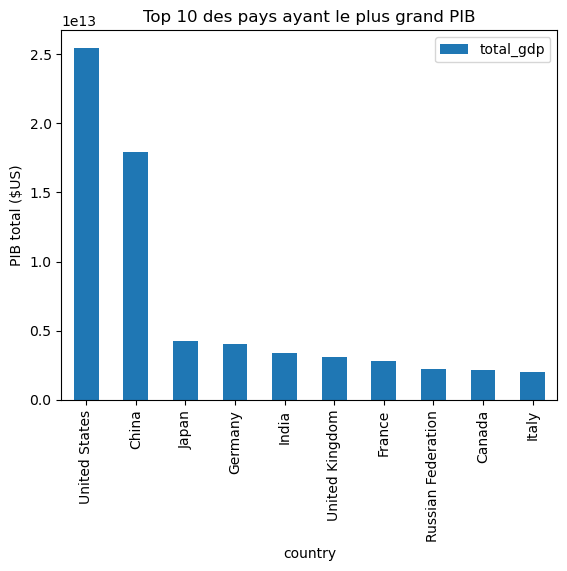

In [39]:
# Définition de la colonne 'country' comme index
top_10_gdp_countries.set_index('country', inplace=True)

top_10_gdp_countries.plot(kind='bar')
plt.ylabel('PIB total ($US)')
plt.title('Top 10 des pays ayant le plus grand PIB')
plt.show()

Top 10 des pays avec le plus grand nobre de population

In [46]:
top_10_population = data.nlargest(10, 'total population')

top_10_population_countries = top_10_population[['country', 'total population']]

top_10_population_countries

,country,total population
85,India,1417173173
35,China,1412175000
193,United States,333287557
83,Indonesia,275501339
143,Pakistan,235824862
135,Nigeria,218541212
26,Brazil,215313498
17,Bangladesh,171186372
156,Russian Federation,143555736
118,Mexico,127504125


Graphique illustrant les 10 pays avec le plus grand nombre de population

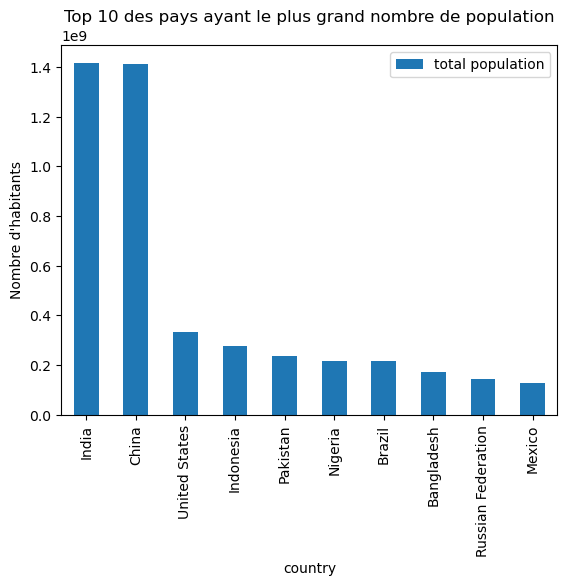

In [47]:
# Définition de la colonne 'country' comme index
top_10_population_countries.set_index('country', inplace=True)

top_10_population_countries.plot(kind='bar')
plt.ylabel('Nombre d\'habitants')
plt.title('Top 10 des pays ayant le plus grand nombre de population')
plt.show()

Relation entre le PIB et la population

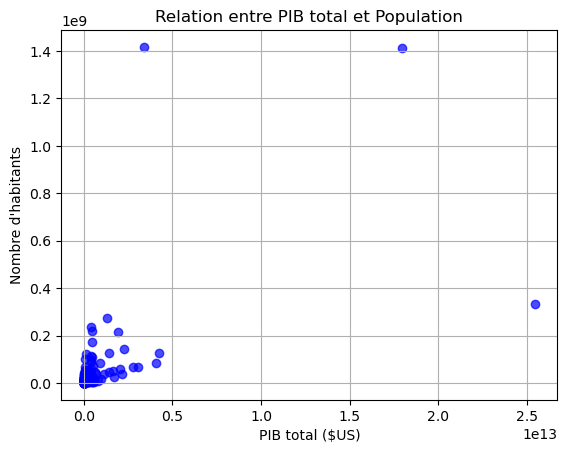

In [53]:
# Tracé du graphique de la relation entre total_gdp et total_population

plt.scatter(data['total_gdp'], data['total population'], color='blue', alpha=0.7)
plt.xlabel('PIB total ($US)')
plt.ylabel('Nombre d\'habitants')
plt.title('Relation entre PIB total et Population')
plt.grid(True)
plt.show()